Завдання №1: Групування та сортування даних
Згруповані та відсортовані дані:
               CRIM         ZN      INDUS       NOX        RM        AGE  \
CHAS RAD                                                                   
1    1     0.015010  90.000000   1.210000  0.401000  7.923000  24.800000   
0    8     0.345052   7.894737   5.862105  0.488684  7.024632  63.994737   
1    24    5.775886   0.000000  18.100000  0.716000  6.611375  90.950000   
     3     0.156265  20.000000   6.960000  0.464000  6.805500  56.650000   
0    3     0.094087  16.180556   4.277778  0.451781  6.454556  48.902778   
1    5     1.304961   1.818182  16.550909  0.671991  6.452727  85.745455   
0    7     0.150399  26.705882   5.034706  0.441000  6.647765  40.141176   
     2     0.083285  20.416667   9.630833  0.484917  6.649958  64.770833   
1    8     0.471570   0.000000   6.200000  0.507000  6.670200  80.100000   
     4     0.195176  15.000000   9.022500  0.473250  6.178750  62.887500   
0    5     

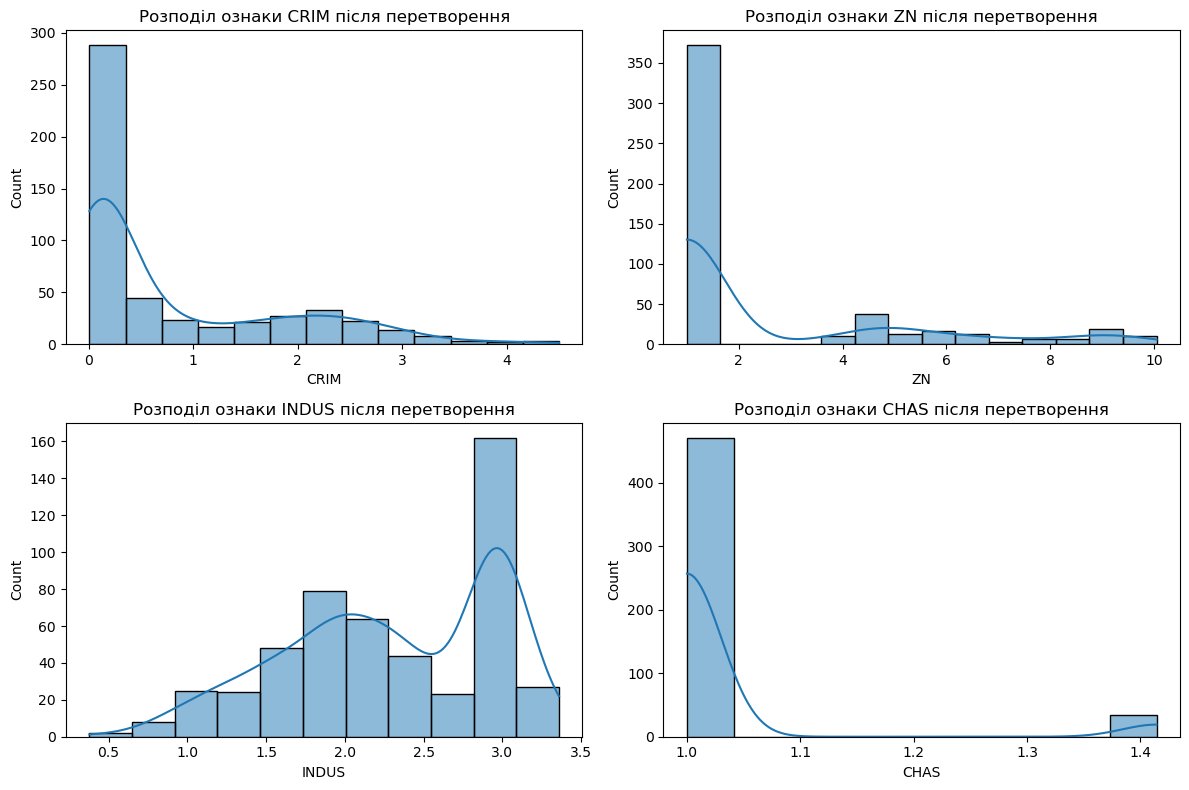

Завдання №4: Кореляційний аналіз
Кореляційна матриця:
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.392398  0.642981 -0.016398  0.713491 -0.304080  0.474729   
ZN      -0.392398  1.000000 -0.665476 -0.042592 -0.565185  0.330341 -0.537520   
INDUS    0.642981 -0.665476  1.000000  0.080314  0.749998 -0.428733  0.533829   
CHAS    -0.016398 -0.042592  0.080314  1.000000  0.087677  0.084905  0.091408   
NOX      0.713491 -0.565185  0.749998  0.087677  1.000000 -0.315675  0.660690   
RM      -0.304080  0.330341 -0.428733  0.084905 -0.315675  1.000000 -0.219573   
AGE      0.474729 -0.537520  0.533829  0.091408  0.660690 -0.219573  1.000000   
DIS     -0.659352  0.645866 -0.741257 -0.089142 -0.837314  0.264089 -0.697654   
RAD      0.860966 -0.356449  0.589910  0.009134  0.613200 -0.212810  0.393700   
TAX      0.824826 -0.353277  0.678126 -0.037191  0.665903 -0.305601  0.414526   
PTRATIO  0.372646 -0.431675  0.415743 -0.116809  0.1797

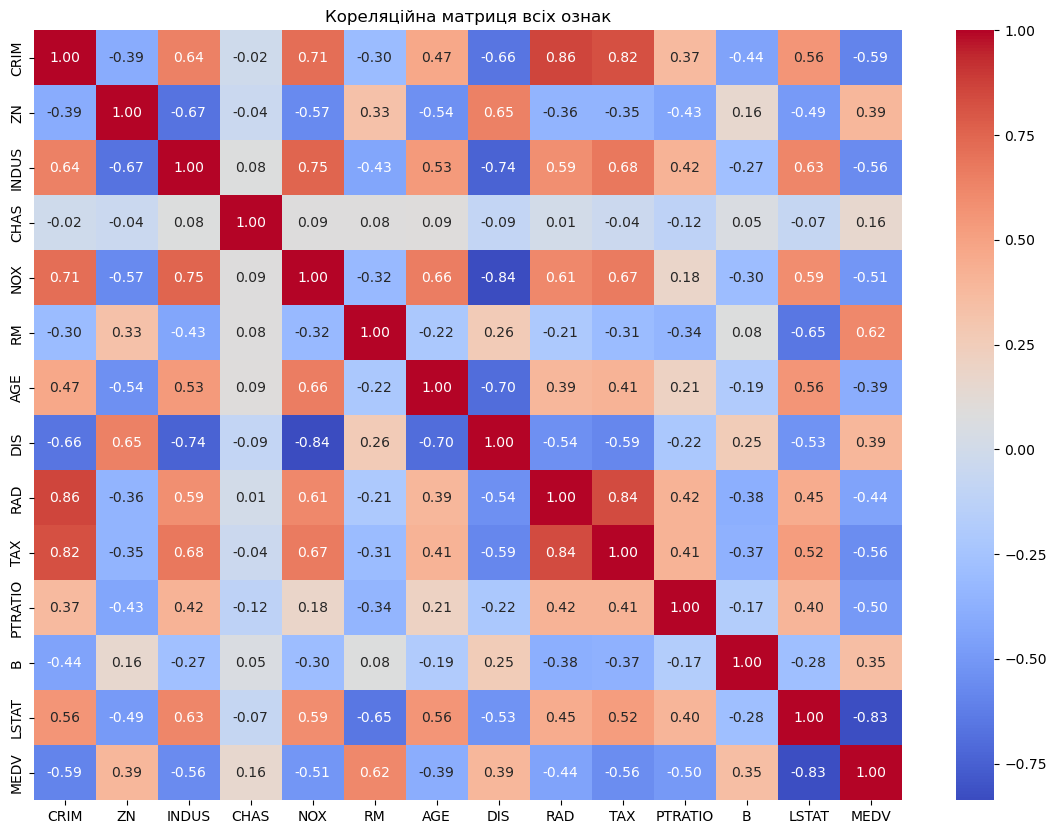

Завдання №5: Feature Engineering
Перетворення категоріальних змінних у числові:
Змінені категоріальні ознаки:
   CHAS  RAD
0     0    0
1     0    1
2     0    1
3     0    2
4     0    2
Конструювання нових ознак:
Нові ознаки:
   TAX_PER_ROOM     AGE_SQ
0      2.811923  17.578569
1      2.740619  19.191197
2      2.612878  17.046543
3      2.600613  14.790818
4      2.577729  16.087824
Відбір значущих ознак:
Значущі ознаки (коефіцієнт кореляції > 0.3):
CRIM       0.594500
ZN         0.391979
INDUS      0.558975
NOX        0.512006
RM         0.619280
AGE        0.391441
DIS        0.390719
RAD        0.444867
TAX        0.555187
PTRATIO    0.495651
B          0.351096
LSTAT      0.827465
MEDV       1.000000
Name: MEDV, dtype: float64

--------------------------------------------------



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

# Завдання №1: Групування та сортування даних
print("Завдання №1: Групування та сортування даних")
df = pd.read_csv("boston.csv")
grouped_df = df.groupby(['CHAS', 'RAD']).mean().sort_values(by='MEDV', ascending=False)
print("Згруповані та відсортовані дані:")
print(grouped_df)
print("\n" + "-" * 50 + "\n")

# Завдання №2: Таблиця співпряженості
print("Завдання №2: Таблиця співпряженості")
contingency_table = pd.crosstab(df['CHAS'], df['RAD'])
print("Таблиця співпряженості змінних CHAS та RAD:")
print(contingency_table)
print("\n" + "-" * 50 + "\n")

# Завдання №3: Перевірка нормальності розподілу
print("Завдання №3: Перевірка нормальності розподілу")
for column in df.select_dtypes(include=[np.number]).columns: # вибирає числові стовпці
    stat, p_value = stats.shapiro(df[column]) # перевірка нормальності розподілу
    print(f"Ознака: {column} | p-значення: {p_value}")
    if p_value < 0.05:
        print("Розподіл не є нормальним. Застосуємо перетворення.")
        df[column] = np.log1p(df[column]) if (df[column] > 0).all() else np.sqrt(df[column] + abs(df[column].min()) + 1)
        stat_transformed, p_value_transformed = stats.shapiro(df[column])
        print(f"Після перетворення: p-значення: {p_value_transformed}")
    print("-" * 50)

# Візуалізація до та після нормалізації
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Розподіл ознаки {column} після перетворення")
plt.tight_layout()
plt.show()

# Завдання №4: Кореляційний аналіз
print("Завдання №4: Кореляційний аналіз")
correlation_matrix = df.corr() # обчислює кореляційну матрицю між числовими змінними
print("Кореляційна матриця:")
print(correlation_matrix)

# Візуалізація кореляційної матриці
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця всіх ознак")
plt.show()

# Завдання №5: Feature Engineering
print("Завдання №5: Feature Engineering")
print("Перетворення категоріальних змінних у числові:")
df['CHAS'] = df['CHAS'].astype('category').cat.codes
df['RAD'] = df['RAD'].astype('category').cat.codes
print("Змінені категоріальні ознаки:")
print(df[['CHAS', 'RAD']].head())

print("Конструювання нових ознак:")
df['TAX_PER_ROOM'] = df['TAX'] / df['RM'] # податок на кімнату
df['AGE_SQ'] = df['AGE'] ** 2 # квадрат віку будівлі
print("Нові ознаки:")
print(df[['TAX_PER_ROOM', 'AGE_SQ']].head())

print("Відбір значущих ознак:")
cor_target = abs(correlation_matrix["MEDV"])
relevant_features = cor_target[cor_target > 0.3] # Вибір ознак з коефіцієнтом кореляції понад 0.3 щодо MEDV
print("Значущі ознаки (коефіцієнт кореляції > 0.3):")
print(relevant_features)
print("\n" + "-" * 50 + "\n")